In [1]:
import cv2, random, os, glob, math, pathlib, csv, PIL
import zipfile

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import pydicom

from os import listdir
from PIL import Image
from tqdm import tqdm 
from pathlib import Path
from skimage import io

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.models as models

from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder

In [2]:
df = pd.read_csv('/home/Sean/Project/iRail_US/12_dcminf.csv')
df

,filename,A,B,Effusion,Consolidation,Location
0,002/002_0005.png,1,0,0,0,RT1
1,002/002_0007.png,1,0,0,0,RT2
2,002/002_0009.png,1,0,0,0,LT1
3,002/002_0010.png,0,0,1,0,LT3
4,002/002_0012.png,1,0,0,0,LT2
...,...,...,...,...,...,...
1674,188/188_0011.png,0,1,0,0,RT1
1675,188/188_0015.png,1,0,0,0,LT1
1676,188/188_0017.png,0,0,1,0,RT3
1677,188/188_0019.png,0,1,0,0,RT1


In [14]:
df2 = pd.read_csv('/home/Sean/Project/iRail_US/2added_dcminf.csv')
df2

,filename,Observation
0,005/005_0003.png,1
1,005/005_0022.png,1
2,005/005_0014.png,1
3,005/005_0019.png,1
4,005/005_0015.png,1
...,...,...
202,188/188_0018.png,1
203,188/188_0015.png,1
204,188/188_0019.png,1
205,188/188_0009.png,1


In [25]:
result = pd.merge(df, df2[['filename', 'Observation']], on='filename', how='outer').fillna(0)
result

,filename,A,B,Effusion,Consolidation,Location,Observation
0,002/002_0005.png,1.0,0.0,0.0,0.0,RT1,0.0
1,002/002_0007.png,1.0,0.0,0.0,0.0,RT2,0.0
2,002/002_0009.png,1.0,0.0,0.0,0.0,LT1,0.0
3,002/002_0010.png,0.0,0.0,1.0,0.0,LT3,0.0
4,002/002_0012.png,1.0,0.0,0.0,0.0,LT2,0.0
...,...,...,...,...,...,...,...
1700,117/117_0011.png,0.0,0.0,0.0,0.0,0,1.0
1701,130/130_0014.png,0.0,0.0,0.0,0.0,0,1.0
1702,188/188_0012.png,0.0,0.0,0.0,0.0,0,1.0
1703,188/188_0014.png,0.0,0.0,0.0,0.0,0,1.0


In [33]:
result.to_csv('/home/Sean/Project/iRail_US/3added_dcminf.csv', index=False)

In [36]:
df = pd.read_csv('/home/Sean/Project/iRail_US/4fixed_dcminf.csv')
df

,filename,A,B,Effusion,Consolidation
0,002/002_0005.png,1,0,0,0
1,002/002_0007.png,1,0,0,0
2,002/002_0009.png,1,0,0,0
3,002/002_0010.png,0,0,1,0
4,002/002_0012.png,1,0,0,0
...,...,...,...,...,...
1700,117/117_0011.png,0,1,0,0
1701,130/130_0014.png,0,1,0,0
1702,188/188_0012.png,0,1,0,0
1703,188/188_0014.png,0,1,0,0


In [55]:
df.iloc[:,1:]

,A,B,Effusion,Consolidation
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1700,0,1,0,0
1701,0,1,0,0
1702,0,1,0,0
1703,0,1,0,0


In [59]:
df.columns[1:]

Index(['A', 'B', 'Effusion', 'Consolidation'], dtype='object')

In [56]:
df.iloc[:,1:].value_counts()

A  B  Effusion  Consolidation
1  0  0         0                1179
0  1  0         0                 363
   0  1         0                  60
1  1  0         0                  56
0  0  0         1                  41
   1  1         0                   6
dtype: int64

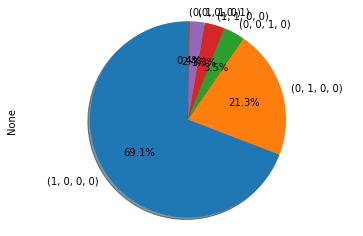

In [60]:
fig1, ax1 = plt.subplots()
df.iloc[:,1:].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax1)
ax1.axis("equal")
plt.show()
